In [1]:
!wget https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=0

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
!unzip dataset.zip?dl=0

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.losses import categorical_crossentropy


#  Building our Model To train the data 

In [3]:
# Working with pre trained model 

base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)

In [4]:
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

# Preparing our data using data generator

In [5]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2, 
     shear_range = 0.2, 
     horizontal_flip=True, 
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "train", 
                                               target_size=(224,224), 
                                               batch_size=32,
                                  )


train_data.class_indices

Found 28709 images belonging to 7 classes.


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [6]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "test", 
                                           target_size=(224,224), 
                                           batch_size=32,
                                  )

Found 7178 images belonging to 7 classes.


# visualizaing the data that is fed to train data gen

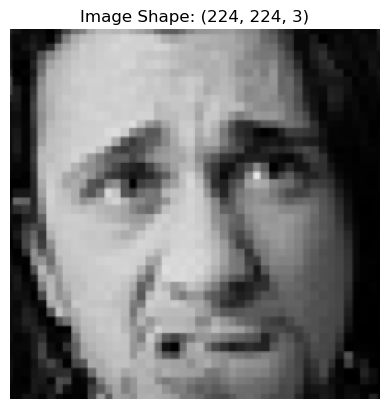

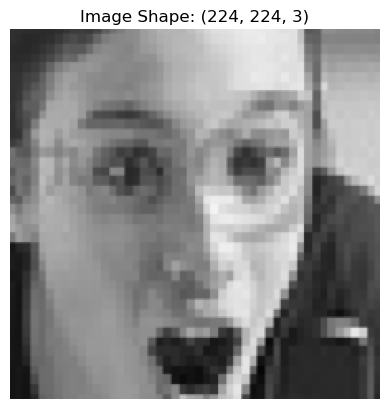

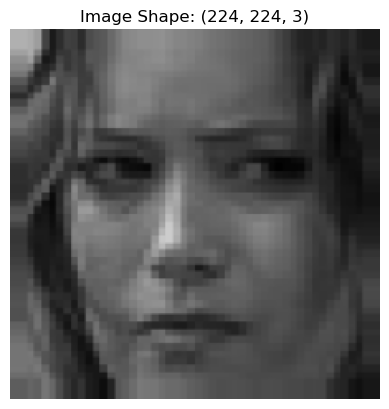

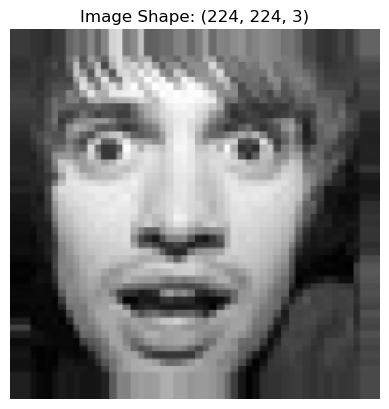

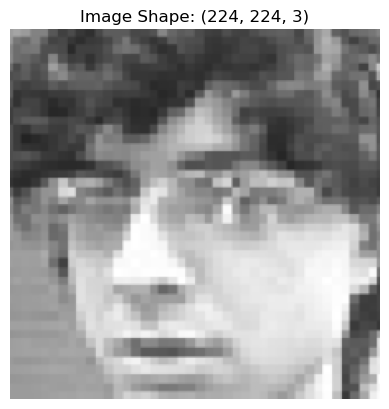

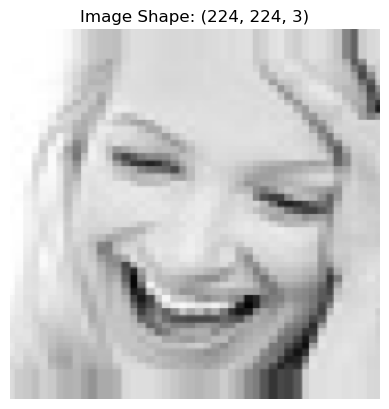

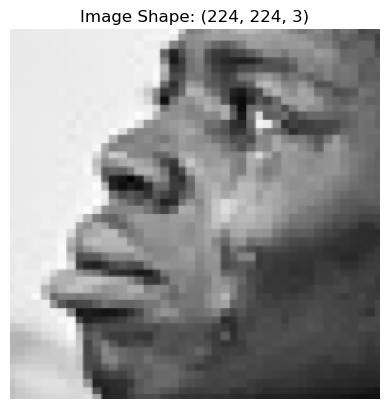

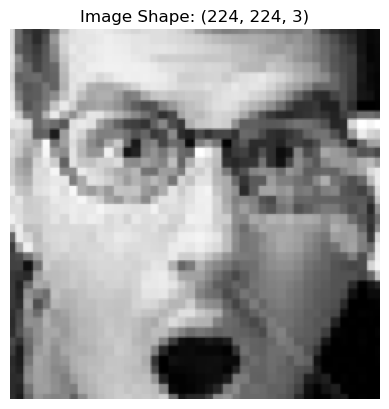

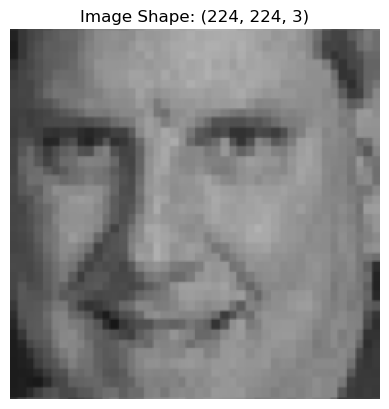

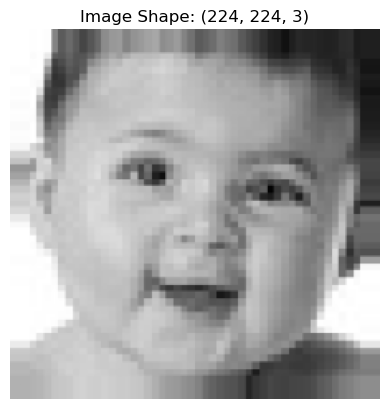

In [7]:
# to visualize the images in the traing data denerator 

t_img, label = next(train_data)  

# Function to plot images
def plotImages(img_arr, label):
    """
    input  :- images array
    output :- plots the images
    """
    count = 0
    for im, l in zip(img_arr, label):
        plt.imshow(im)
        plt.title(f'Image Shape: {im.shape}')
        plt.axis('off')  # Correct axis disabling
        plt.show()

        count += 1
        if count == 10:  # Limit to 10 images for visualization
            break

# Function call to plot the images
plotImages(t_img, label)


# having early stopping and model check point

In [8]:
## having early stopping and model check point 

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

# Model checkpoint to save only weights in .h5 format
mc = ModelCheckpoint(filepath="eds_model.weights.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto', save_weights_only=True)


# puting call back in a list 
call_back = [es, mc]

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Create an ImageDataGenerator for training and validation
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Define the directories containing your training and validation images
train_directory = 'train'   # Update with your actual training data path
validation_directory = 'test'   # Update with your actual validation data path

# Create the generators
train_generator = train_datagen.flow_from_directory(
    train_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

# Define ModelCheckpoint callback to save the best model
mc = ModelCheckpoint('eds_model.keras', monitor='val_accuracy', save_best_only=True, verbose=1)

# Train the model with early stopping and model checkpoint
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    callbacks=[early_stopping, mc],  # Use both callbacks
    verbose=1
)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Epoch 1/30


C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 512ms/step - accuracy: 0.4004 - loss: 7.5336
Epoch 1: val_accuracy improved from -inf to 0.49108, saving model to eds_model.keras
898/898 ━━━━━━━━━━━━━━━━━━━━ 534s 589ms/step - accuracy: 0.4004 - loss: 7.5335 - val_accuracy: 0.4911 - val_loss: 7.8245
Epoch 2/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step - accuracy: 0.5129 - loss: 7.0427
Epoch 2: val_accuracy improved from 0.49108 to 0.50906, saving model to eds_model.keras
898/898 ━━━━━━━━━━━━━━━━━━━━ 489s 542ms/step - accuracy: 0.5128 - loss: 7.0431 - val_accuracy: 0.5091 - val_loss: 8.4556
Epoch 3/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step - accuracy: 0.5528 - loss: 7.0938
Epoch 3: val_accuracy did not improve from 0.50906
898/898 ━━━━━━━━━━━━━━━━━━━━ 499s 553ms/step - accuracy: 0.5528 - loss: 7.0942 - val_accuracy: 0.4875 - val_loss: 9.8962
Epoch 4/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step - accuracy: 0.5698 - loss: 6.9922
Epoch 4: val_accuracy improved from 0.50906 to 0.52647, saving model to 

898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step - accuracy: 0.7014 - loss: 6.7741
Epoch 25: val_accuracy did not improve from 0.55378
898/898 ━━━━━━━━━━━━━━━━━━━━ 497s 552ms/step - accuracy: 0.7014 - loss: 6.7743 - val_accuracy: 0.5201 - val_loss: 17.0310
Epoch 26/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step - accuracy: 0.6992 - loss: 6.7656
Epoch 26: val_accuracy did not improve from 0.55378
898/898 ━━━━━━━━━━━━━━━━━━━━ 496s 550ms/step - accuracy: 0.6992 - loss: 6.7657 - val_accuracy: 0.5347 - val_loss: 16.4076
Epoch 27/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step - accuracy: 0.7083 - loss: 6.5890
Epoch 27: val_accuracy did not improve from 0.55378
898/898 ━━━━━━━━━━━━━━━━━━━━ 495s 549ms/step - accuracy: 0.7083 - loss: 6.5892 - val_accuracy: 0.5510 - val_loss: 15.4612
Epoch 28/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step - accuracy: 0.7224 - loss: 6.1408
Epoch 28: val_accuracy did not improve from 0.55378
898/898 ━━━━━━━━━━━━━━━━━━━━ 494s 548ms/step - accuracy: 0.7223 - loss: 6.1414 - v

In [10]:

# Loading the best fit model 
from keras.models import load_model
model = load_model("eds_model.keras")

In [18]:
h =  history.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

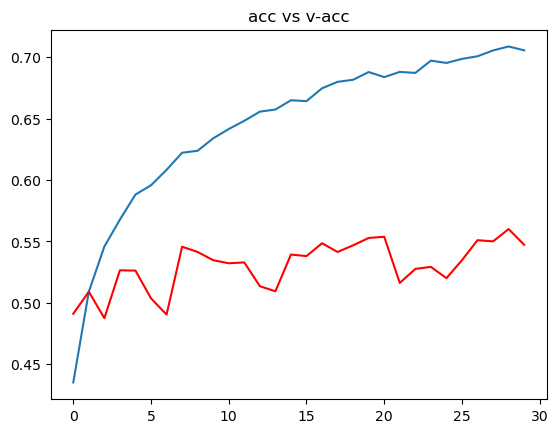

In [19]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

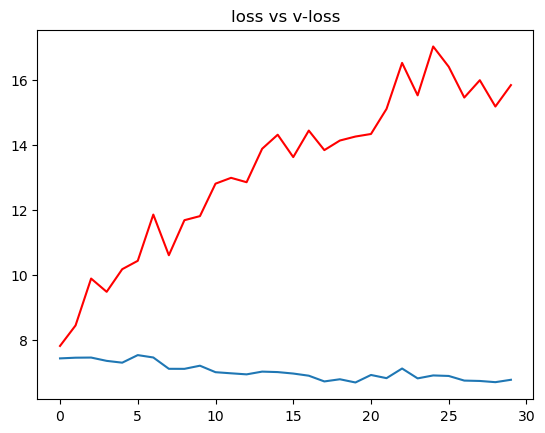

In [20]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [21]:
# just to map o/p values 
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step
 the image is of sad


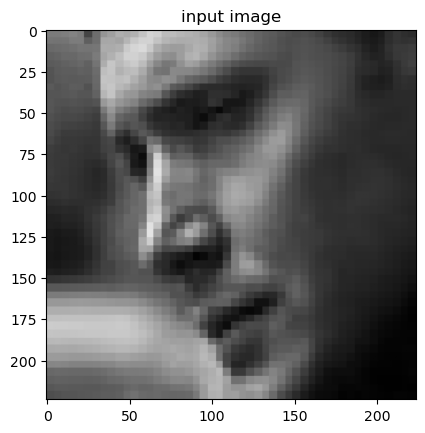

In [22]:
# path for the image to see if it predics correct class

path = "test/angry/PrivateTest_1054527.jpg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image  
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()